This project predicts which hotel reservations will be cancelled. The data set comes from real life data. 

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import math


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/Users/mksis/Documents/Data Science/DS630 Predictive Analytics/Data Sets/Hotel_Bookings.csv')
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [4]:
df.dtypes

Booking_ID                   object
number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                 object
car parking space             int64
room type                    object
lead time                     int64
market segment type          object
repeated                      int64
P-C                           int64
P-not-C                       int64
average price               float64
special requests              int64
date of reservation          object
booking status               object
dtype: object

In [5]:
df.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

This data set is hotel booking cancellation information. 

In [6]:
col_names = list(df)
col_names

#lead time: # of days between booking date and the arrival date
#repeated: indicates whether booking is a repeat booking
#P-C: Previous bookings cancelled prior to current booking
#P-not-C: Previous bookings not cancelled prior to current booking

['Booking_ID',
 'number of adults',
 'number of children',
 'number of weekend nights',
 'number of week nights',
 'type of meal',
 'car parking space',
 'room type',
 'lead time',
 'market segment type',
 'repeated',
 'P-C',
 'P-not-C',
 'average price',
 'special requests',
 'date of reservation',
 'booking status']

In [7]:
#Describe statistics of data set
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [8]:
#Shape of the data set (36285 rows, 17 columns)
df.shape

(36285, 17)

In [9]:
#visualize correlations
corr_matrix = df.corr()

round(corr_matrix,3)

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
number of adults,1.000,-0.020,0.103,0.105,0.011,0.097,-0.192,-0.047,-0.119,0.297,0.189
number of children,-0.020,1.000,0.030,0.025,0.034,-0.047,-0.036,-0.016,-0.021,0.337,0.124
number of weekend nights,0.103,0.030,1.000,0.180,-0.031,0.047,-0.067,-0.021,-0.026,-0.005,0.060
number of week nights,0.105,0.025,0.180,1.000,-0.049,0.150,-0.100,-0.030,-0.049,0.023,0.046
car parking space,0.011,0.034,-0.031,-0.049,1.000,-0.066,0.111,0.027,0.064,0.061,0.088
lead time,0.097,-0.047,0.047,0.150,-0.066,1.000,-0.136,-0.046,-0.078,-0.063,-0.102
repeated,-0.192,-0.036,-0.067,-0.100,0.111,-0.136,1.000,0.391,0.539,-0.175,-0.012
P-C,-0.047,-0.016,-0.021,-0.030,0.027,-0.046,0.391,1.000,0.468,-0.063,-0.003
P-not-C,-0.119,-0.021,-0.026,-0.049,0.064,-0.078,0.539,0.468,1.000,-0.114,0.027
average price,0.297,0.337,-0.005,0.023,0.061,-0.063,-0.175,-0.063,-0.114,1.000,0.184


In [10]:
#Drop unnecessary columns
df = df.drop(['Booking_ID', 'date of reservation'], axis = 1)
df.shape

(36285, 15)

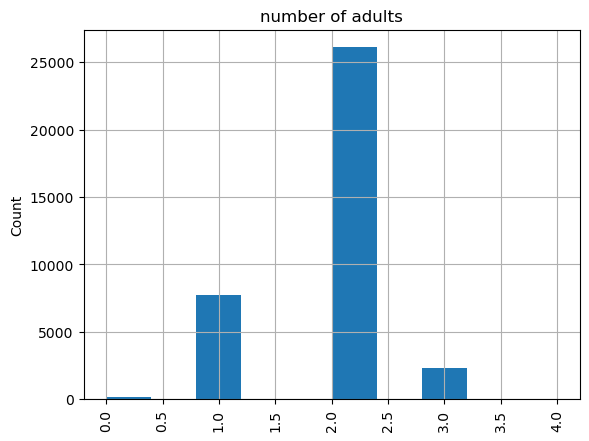

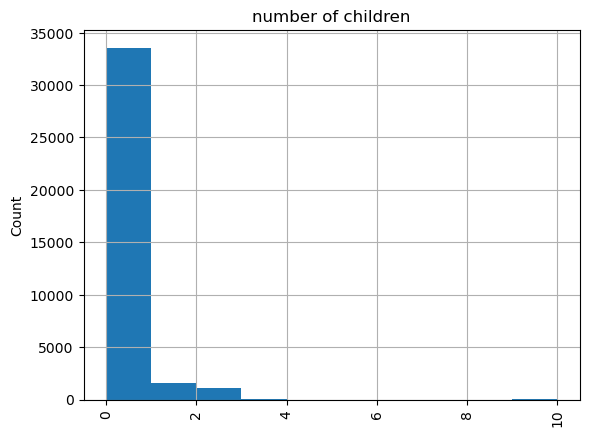

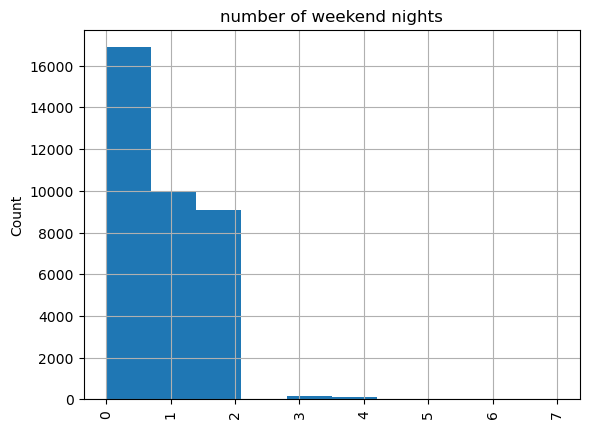

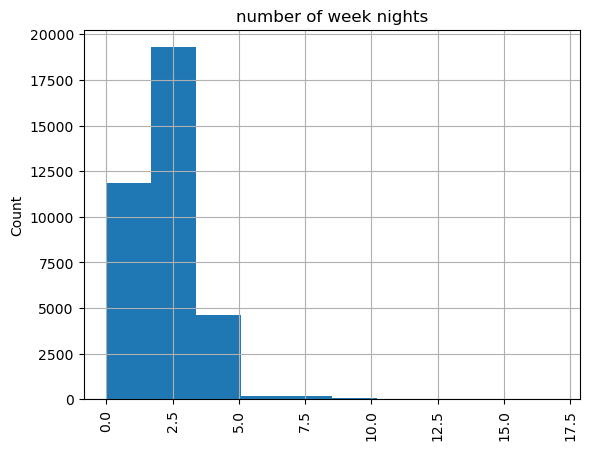

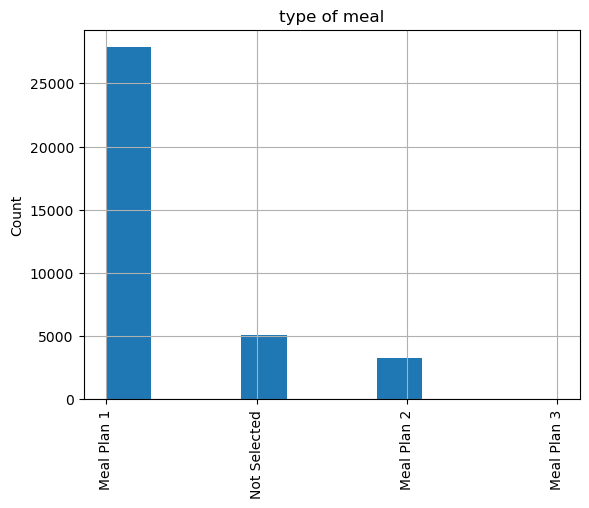

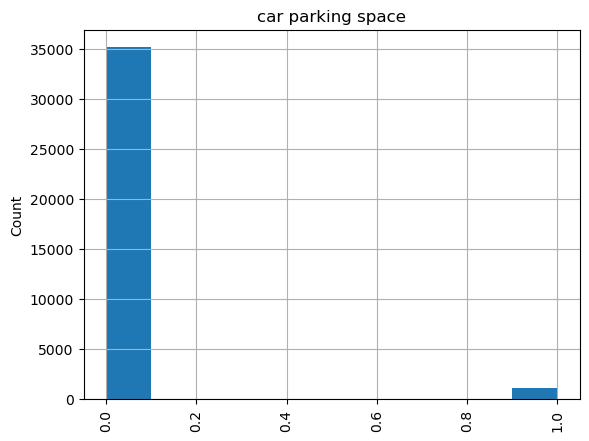

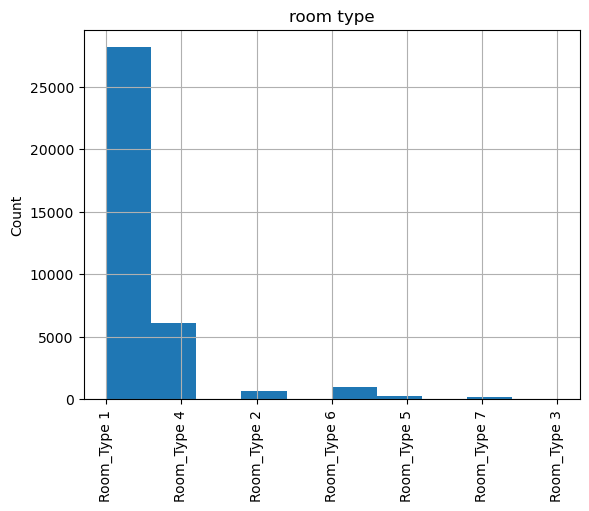

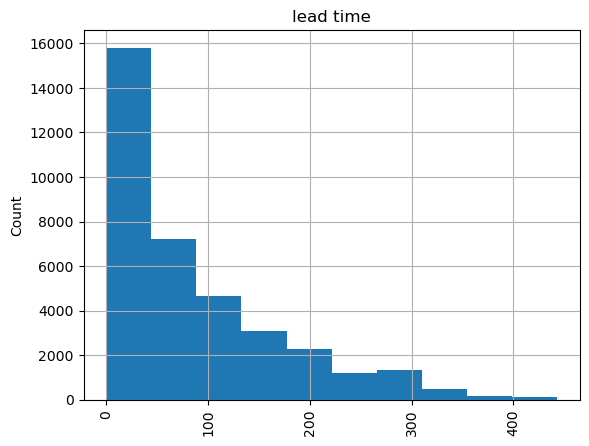

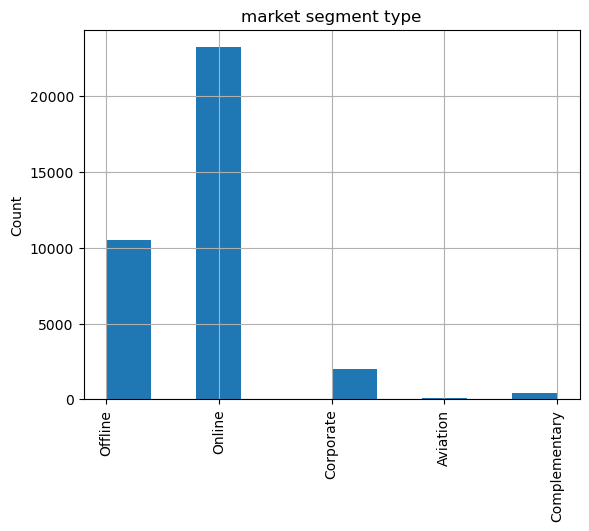

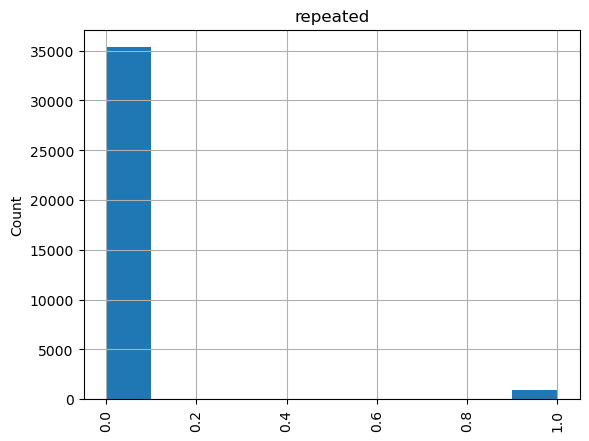

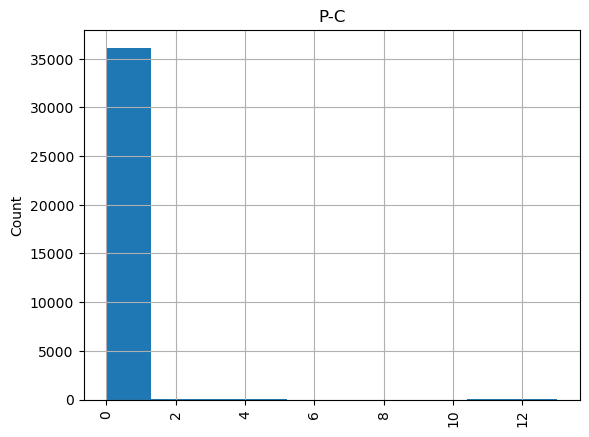

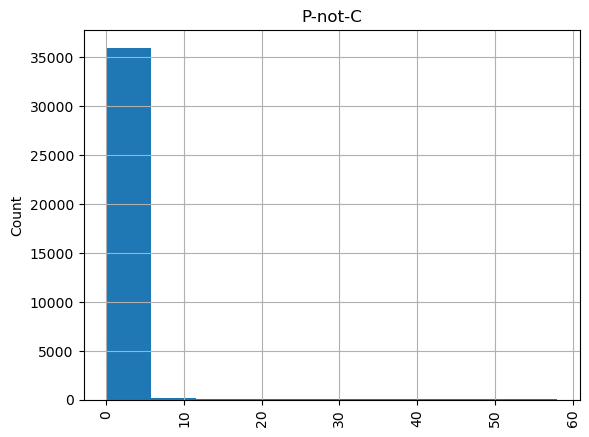

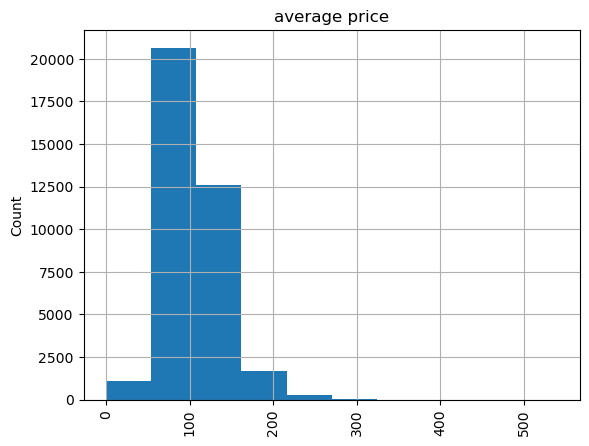

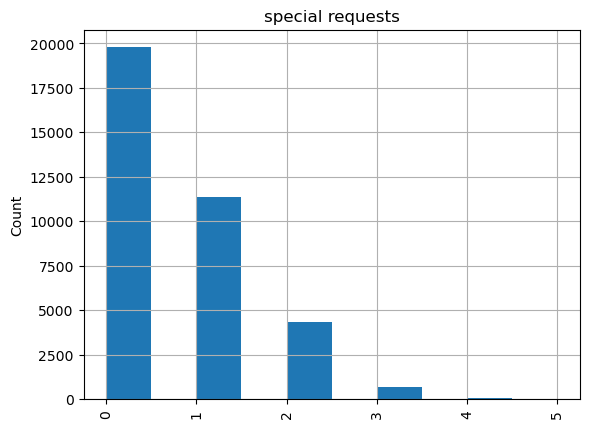

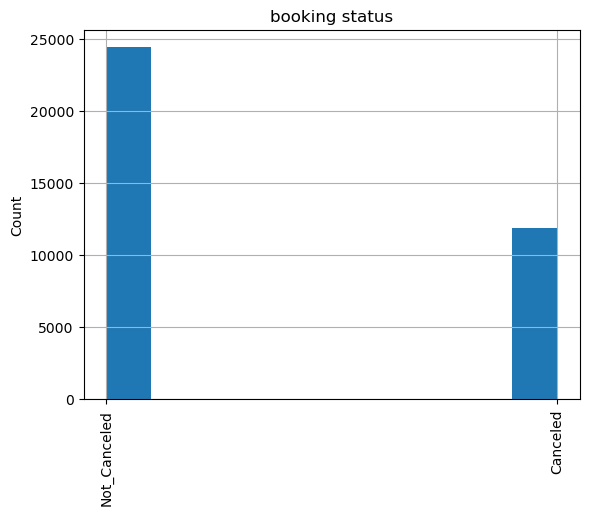

In [11]:
#Visualize the data - histograms of the columns
col_names = list(df.columns)

for i in col_names:
    df[i].hist()
    plt.title(i)
    plt.ylabel('Count')
    plt.xticks(rotation = 'vertical')
    plt.show()



<AxesSubplot:>

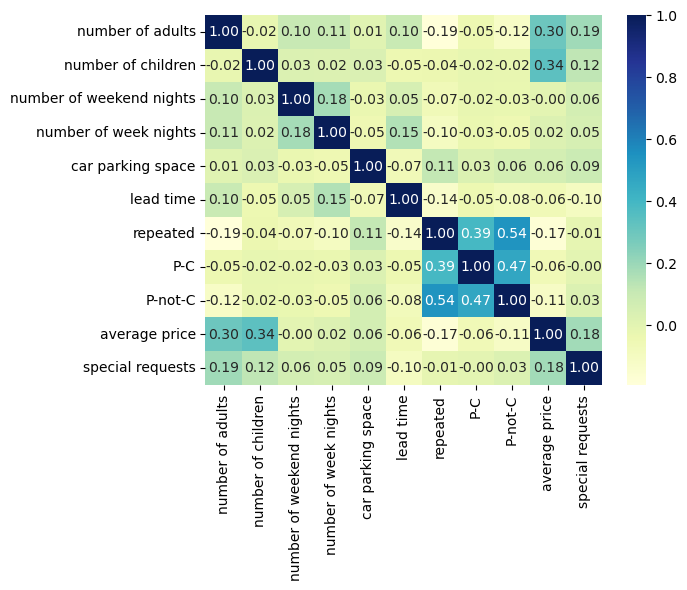

In [12]:
#Creating heatmap of data frame
sb.heatmap(corr_matrix, annot = True, cmap = 'YlGnBu', fmt = '.2f')

#The heatmap shows that 'P-not-C' is positively correlated with 'repeated'; 0.54
#'P-C' is positively correlated with 'P-not-C'; 0.47

In [13]:
#Create dummy variables

df = pd.get_dummies(df)
df.head(3)

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,...,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,market segment type_Aviation,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online,booking status_Canceled,booking status_Not_Canceled
0,1,1,2,5,0,224,0,0,0,88.00,...,0,0,0,0,0,0,1,0,0,1
1,1,0,1,3,0,5,0,0,0,106.68,...,0,0,0,0,0,0,0,1,0,1
2,2,1,1,3,0,1,0,0,0,50.00,...,0,0,0,0,0,0,0,1,1,0


In [14]:
#Split data into X(independent) and y (dependent)

X = df.drop(['booking status_Canceled','booking status_Not_Canceled'], axis = 1)
y = df['booking status_Canceled']

#view shape
X.shape, y.shape

((36285, 27), (36285,))

Logistic Regression Model

In [15]:
#Split into training and testing data sets
#Randomize data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

print('Training set shape: ', X_train.shape, y_train.shape)
print('Testing set shape: ', X_test.shape, y_test.shape)

Training set shape:  (29028, 27) (29028,)
Testing set shape:  (7257, 27) (7257,)


In [16]:
#Scaling the data

scale_X = StandardScaler()
X_train = scale_X.fit_transform(X_train)
X_test = scale_X.transform(X_test)


In [17]:
#Train linear regression model on training set

lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [18]:
#Predict on the test set

y_pred = lr.predict(X_test)
y_pred


array([1, 0, 0, ..., 1, 0, 1], dtype=uint8)

In [19]:
#Comparing y_pred with y_test

y_test

36238    1
83       0
23449    0
14981    0
18392    0
        ..
19588    1
5010     1
9986     1
33253    0
724      1
Name: booking status_Canceled, Length: 7257, dtype: uint8

In [20]:
#Creating confusion metrics for Logistic Regression model

confusion_matrix_lr = metrics.confusion_matrix(y_test, y_pred)

cm_df_lr = pd.DataFrame(confusion_matrix_lr)
cm_df_lr

,0,1
0,4345,510
1,931,1471


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      4855
           1       0.74      0.61      0.67      2402

    accuracy                           0.80      7257
   macro avg       0.78      0.75      0.76      7257
weighted avg       0.80      0.80      0.80      7257



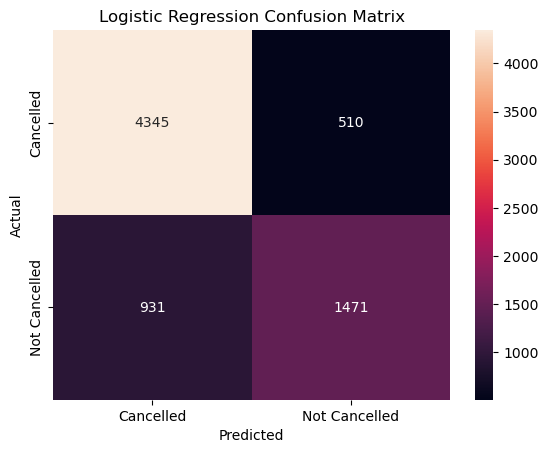

In [37]:
#Confusion Matrix Heatmap of Logistic Regression Model
sb.heatmap(cm_df_lr, annot = True, fmt = 'd', xticklabels = ['Cancelled', 'Not Cancelled'], 
           yticklabels = ['Cancelled', 'Not Cancelled'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [23]:
#Accuracy of the logistic regression model
print('Accuracy of Logistic Regression model: ', metrics.accuracy_score(y_test, y_pred))

Accuracy of Logistic Regression model:  0.8014330990767535


<AxesSubplot:title={'center':'Feature Importance LR model'}, ylabel='Feature'>

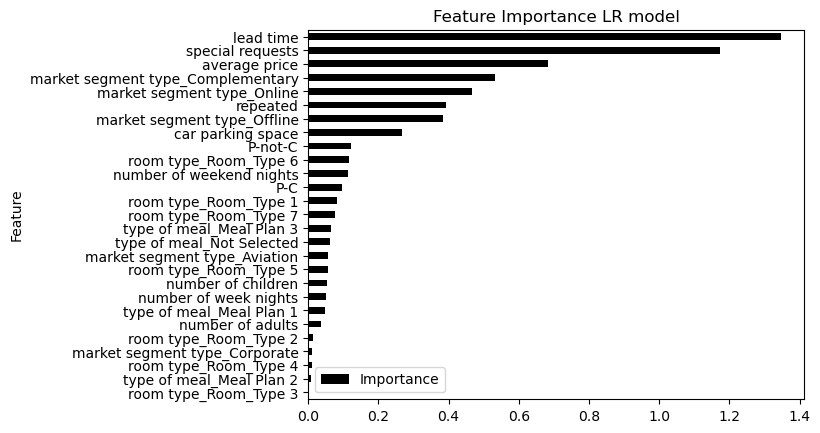

In [24]:
#Feature Importance for Logistic Regression model

coefficients = lr.coef_[0]

feature_importance_lr = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance_lr = feature_importance_lr.sort_values('Importance', ascending = True)
feature_importance_lr.plot(x = 'Feature', y = 'Importance', kind = 'barh', title = 'Feature Importance LR model', color = 'black')

K Nearest Neighbors

In [25]:
#Scale the data
scale_X = StandardScaler()
X_train_knn = scale_X.fit_transform(X_train)
X_test_knn = scale_X.transform(X_test)

In [26]:
#Find the square root of the number of observations in the y test dataset.
math.sqrt(len(y_test))

85.18802732778826

In [27]:
#Create a KNN classifier using euclidean metric
#Use 5 for the number of neighbors
knn = KNeighborsClassifier(n_neighbors= 5, p=2, metric='euclidean')

In [28]:
#Fit and train KNN model
knn.fit(X_train_knn, y_train)

KNeighborsClassifier(metric='euclidean')

In [29]:
#Prediction of K Nearest Neighbor after predicting the X_training set
y_pred_knn = knn.predict(X_test_knn)
y_pred_knn

array([0, 0, 0, ..., 1, 0, 1], dtype=uint8)

In [30]:
#Evaluate KNN Model
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)

cm_df_knn = pd.DataFrame(confusion_matrix_knn)
cm_df_knn

,0,1
0,4415,440
1,638,1764


In [31]:
#print(confusion_matrix_knn)
#print(f1_score(y_test, y_pred))

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4855
           1       0.80      0.73      0.77      2402

    accuracy                           0.85      7257
   macro avg       0.84      0.82      0.83      7257
weighted avg       0.85      0.85      0.85      7257



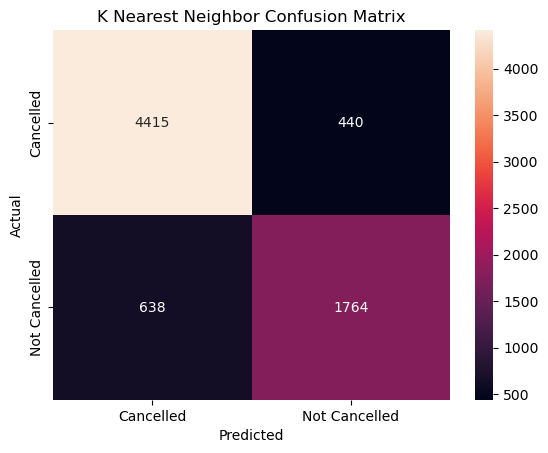

In [36]:
#Confusion Matrix Heatmap of KNN Model
sb.heatmap(cm_df_knn, annot = True, fmt = 'd', xticklabels = ['Cancelled', 'Not Cancelled'], 
           yticklabels = ['Cancelled', 'Not Cancelled'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('K Nearest Neighbor Confusion Matrix')
plt.show()

In [33]:
#Accuracy of the knn model
print('Accuracy of K Nearest Neighbor model: ', metrics.accuracy_score(y_test, y_pred_knn))

Accuracy of K Nearest Neighbor model:  0.8514537687749759


### Explain results of accuracy model
In conclusion, after creating two classification models for this hotel cancellation dataset, both models performed well and are considered strong models, although if I were to only choose one, the K Nearest Neighbor model performed the best. 
I would be interested to have a deeper understanding of the data set and know if this information came from one hotel chain or from many. That way I could try to account for any bias from the data. I would also want to reiterate these models by having more up to date information and see if the models perform just as well with reservation data from this past year.
